## Velocity Distribution

Here we want to find the distribution of amplitude/weight of each note played.

The amplitude/weight of each note is contained in the music21's note object, under property volume.velocity().

In [3]:
import music21
import os, glob
import matplotlib.pyplot as plt
import numpy as np  

In [4]:
files = '../midi-files/mozart/*.mid'
test_file = '../midi-files/mozart/sonat-1.mid'

In [5]:
# set parameters
sample_freq=12
note_range=62
note_offset=33
chamber=0
numInstruments=1

In [6]:
# define 2 types of filters
noteFilter=music21.stream.filters.ClassFilter('Note')
chordFilter=music21.stream.filters.ClassFilter('Chord')

In [7]:
all_velocity = []

In [8]:
for file in glob.glob(files):
    
    # load each midi file as music21 object
    mf=music21.midi.MidiFile()
    mf.open(file)
    mf.read()
    mf.close()
    
    # convert midi file into stream object
    midi_stream=music21.midi.translate.midiFileToStream(mf)
    s = midi_stream
    
    # loop through both filters to get notes
    for n in s.recurse().addFilter(noteFilter):
        all_velocity.append(n.volume.velocity)
    for n in s.recurse().addFilter(chordFilter):
        all_velocity.append(n.volume.velocity)

In [9]:
len(all_velocity)

10280

3986

In [10]:
min(all_velocity), max(all_velocity)

(30, 127)

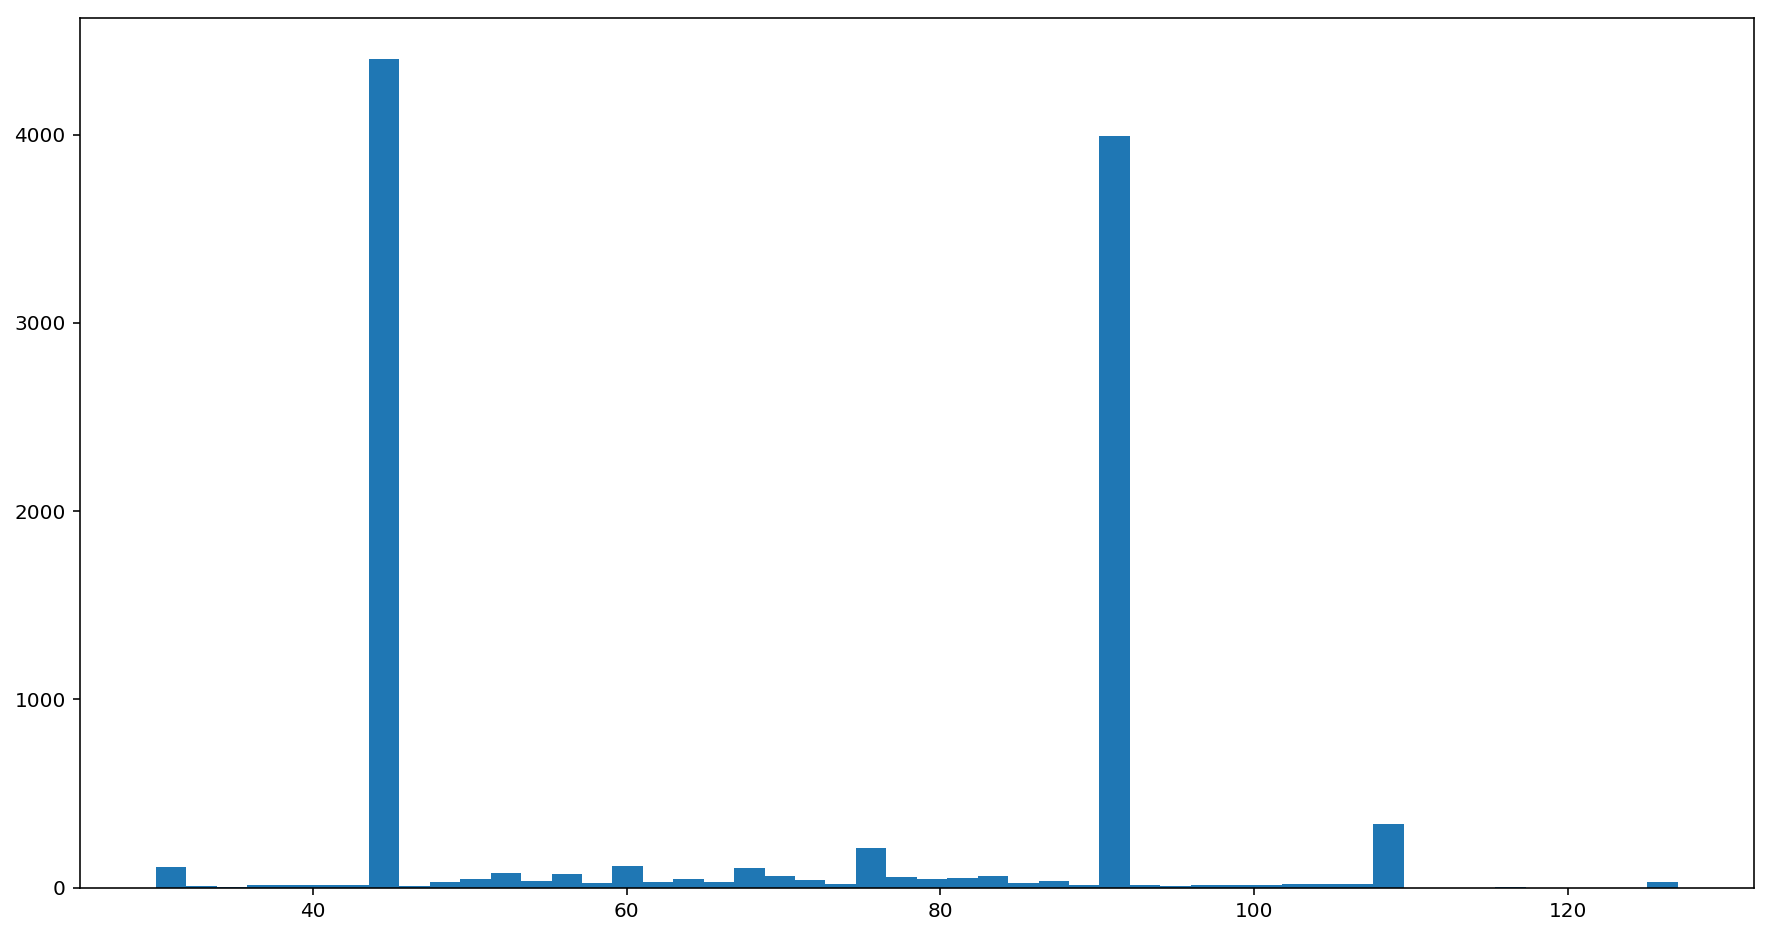

In [11]:
plt.figure(figsize=(15,8))
plt.hist(all_velocity, bins=50);

In [ ]:
pp: 0-40 = 35

p : 40-50 = 45 (most common)

mp: 50-70 = 60
mf: 70-90 = 80

f : 90-100 = 95 (2nd most common)
    
ff: 100-127 = 105